# Simulation of Prices of Coupon Bearing Bonds using CIR

In [20]:
import numpy as np
import pandas as pd
import risk_ as rk
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
rk.bond_price(5, 100, .05, 12, .03)

0    109.275393
dtype: float64

In [22]:
rates, zc_prices = rk.cir(10, 500, b=0.03, r_0=0.03)

In [23]:
rk.bond_price(5, 100, .05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [24]:
# Bond prices at t=1 have started to diverge
rk.bond_price(5, 100, .05, 12, rates.iloc[1][[1,2,3]])

1    108.364245
2    108.916605
3    108.704392
dtype: float64

In [25]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.031881,0.030739,0.031177
2,0.029153,0.035109,0.034829
3,0.029297,0.033854,0.036794
4,0.031121,0.031978,0.032928


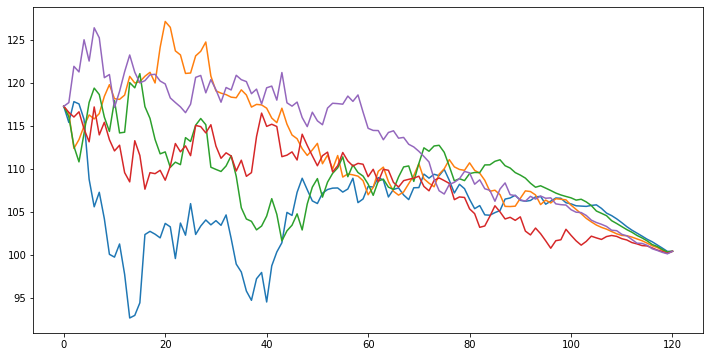

In [26]:
rk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(12,6))

In [27]:
prices = rk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,115.388,116.446,116.039,116.563,117.695
2,117.804,112.368,112.616,116.017,121.906
3,117.54,113.392,110.805,116.625,121.256
4,115.743,114.969,114.118,114.626,124.994
...,...,...,...,...,...
116,101.522,101.058,101.202,100.81,100.711
117,101.155,100.853,100.972,100.564,100.516
118,100.788,100.54,100.627,100.385,100.291
119,100.403,100.286,100.333,100.171,100.122


In [28]:
br = prices.pct_change().dropna()
rk.annualize_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [29]:
p = rk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,]])
btr = rk.bond_total_return(p, 100, .05, 12)
rk.annualize_rets(btr, 12)

1    0.032720
2    0.029833
3    0.030800
4    0.031163
dtype: float64

In [30]:
price_10 = rk.bond_price(10, 100, .05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,101.522,101.058,101.202
117,101.155,100.853,100.972
118,100.788,100.54,100.627
119,100.403,100.286,100.333
120,100.417,100.417,100.417


In [31]:
price_30 = rk.bond_price(30, 100, .05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,188.924,154.129,164.064
117,190.146,159.263,170.633
118,192.807,155.139,167.197
119,195.589,159.174,172.886
120,194.294,153.189,174.27


In [32]:
price_30[[1,2,3]].head()

,1,2,3
0,139.532,139.532,139.532
1,134.909,137.651,136.59
2,141.51,127.511,128.125
3,141.075,130.249,123.859
4,136.537,134.506,132.302


In [33]:
rets_30 = rk.bond_total_return(price_30, 100, .05, 12)
rets_10 = rk.bond_total_return(price_10, 100, .05, 12)
# Assumes a rebalance to 60/40% portfolio weights at the end of each month
rets_bonds = .6*rets_10 + .4*rets_30

In [34]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
rk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035463,0.00374,0.164815,3.324536,-0.001198,-0.000596,1.421757,0.0


In [35]:
price_eq = rk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [36]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [37]:
rets_bonds.shape

(120, 500)

In [38]:
rets = .7*rets_eq + .3*rets_bonds
rets_mean = rets.mean(axis='columns')
rk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.057675,0.004761,0.128106,2.723255,-0.002476,-0.00205,5.657921,0.0
